# Telecom Customers Data

In [2]:
import pandas as pd
telecom = pd.read_csv("F:/Python Material/ML with Python/Datasets/Telecom.csv")
telecom.head()

,Gender,TT_gt_100,Response
0,F,Y,N
1,M,N,N
2,M,N,N
3,F,Y,Y
4,F,N,N


In [5]:
dum_telecom = pd.get_dummies(telecom, drop_first=True)
dum_telecom.head()

,Gender_M,TT_gt_100_Y,Response_Y
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,1
4,0,0,0


In [7]:
X = dum_telecom.iloc[:,0:2]
y = dum_telecom.iloc[:,2]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

Using Multinomial Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
y_pred = multinomial.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1], dtype=uint8)

Model Evaluation:

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))

[[11 11]
 [ 2 21]]


In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.50      0.63        22
          1       0.66      0.91      0.76        23

avg / total       0.75      0.71      0.70        45



In [17]:
print(accuracy_score(y_test, y_pred))

0.7111111111111111


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = multinomial.predict_proba(X_test)[:,1]
y_pred_prob

array([0.81733746, 0.20404722, 0.20404722, 0.81733746, 0.81733746,
       0.20404722, 0.20404722, 0.51047673, 0.81733746, 0.51047673,
       0.81733746, 0.81733746, 0.81733746, 0.20404722, 0.20404722,
       0.20404722, 0.81733746, 0.20404722, 0.51047673, 0.52380952,
       0.20404722, 0.81733746, 0.52380952, 0.20404722, 0.51047673,
       0.81733746, 0.81733746, 0.81733746, 0.20404722, 0.81733746,
       0.52380952, 0.81733746, 0.20404722, 0.51047673, 0.81733746,
       0.81733746, 0.81733746, 0.20404722, 0.81733746, 0.81733746,
       0.51047673, 0.81733746, 0.51047673, 0.81733746, 0.81733746])

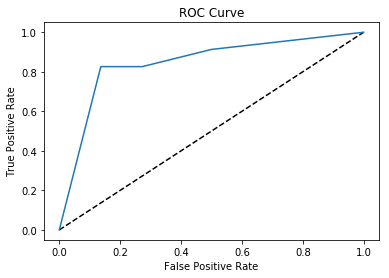

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [24]:
roc_auc_score(y_test, y_pred_prob)

0.8448616600790514